# Pairs Trading

###### importing packages

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
# importing libraries and modules
import matplotlib .cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import adfuller
import statsmodels.regression.linear_model as rg
from scipy import stats
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [ ]:
import matplotlib.dates as mdates

In [ ]:
!pip install yahooquery
from yahooquery import Ticker

In [ ]:
!apt-get update
!pip install latex
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [634 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,304 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,596 kB]
Get:13 http://archive.ubuntu.

In [ ]:
# set default to latex fonts
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})
plt.rcParams.update({'font.size': 8})

## data preliminaries

###### import data

In [ ]:
# import the S&P500 index
sp = yf.download('^GSPC', start="2021-08-31", end="2023-08-31").loc[:, "Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# import the Nasdaq Composite index
#nasdaq = yf.download('^IXIC', start="2021-08-31", end="2023-08-31").loc[:, "Adj Close"]

In [ ]:
# import the S&P Technology index
tech = yf.download('^SP500-45', start="2021-08-31", end="2023-08-31").loc[:, "Adj Close"]

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# give access to the drive
from google.colab import drive ; import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# set the search parameters
filename = 'aksjer.xlsx'
search_path = '/content/drive'
#search_path = '/content/drive/My Drive'

# search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

# import dataset
aksjer = pd.read_excel(file_path, sheet_name = "tech")

In [ ]:
# fix wrong tickers
aksjer = aksjer.replace("ACNA", "ACN")
aksjer = aksjer.replace("AMDA", "AMD")
aksjer = aksjer.replace("APHA", "APH")
aksjer = aksjer.replace("CDWC", "CDW")
aksjer = aksjer.replace("MSIM", "MSI")
aksjer = aksjer.replace("PTCP", "PTC")
aksjer = aksjer.replace("ROPR", "ROP")
aksjer = aksjer.replace("TELT", "TEL")
aksjer = aksjer.replace("TERT", "TER")
aksjer = aksjer.replace("TXNT", "TXN")
aksjer = aksjer.replace("TYLT", "TYL")
aksjer = aksjer.replace("WDCW", "WDC")

In [ ]:
# dataset on prices of all technology stocks
prices = yf.download(list(aksjer["Ticker"]), "2021-8-30", "2023-8-30")["Adj Close"]
prices = prices.ffill().bfill()

[*********************100%%**********************]  64 of 64 completed


In [ ]:
# import the S&P Technology index
#sp_Xtech = yf.download('^SPXXTSUP', start="2021-08-31", end="2023-08-31").loc[:, "Adj Close"]

###### calculate log returns

In [ ]:
# calculate log returns
returns = np.log(prices/prices.shift(1))

In [ ]:
# log returns of index
tech_log_rets = np.log(tech / tech.shift(1))

In [ ]:
# log returns of index
sp_log_rets = np.log(sp / sp.shift(1))

###### split the data into train, validation, and test

In [ ]:
# divide into train/test datasets -- 70/15/15
ret_train, ret_test = train_test_split(returns, test_size = 0.3, shuffle = False)
ret_val, ret_test = train_test_split(ret_test, test_size = 0.5, shuffle = False)

In [ ]:
# divide into train/test/validation datasets -- 70/15/15
prices_train, prices_test = train_test_split(prices,
                                             test_size = 0.3, shuffle = False)
prices_val, prices_test = train_test_split(prices_test,
                                           test_size = 0.5, shuffle = False)

## graphs and visualisations of descriptive statistics

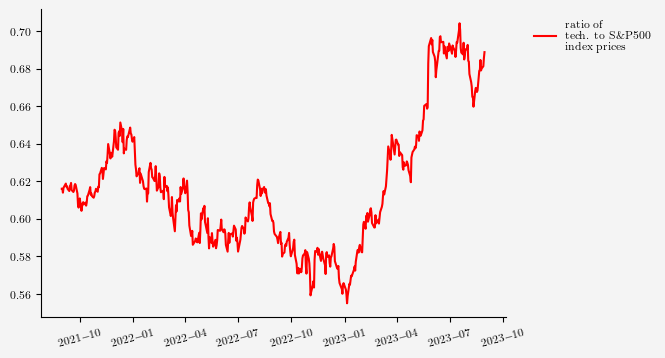

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.plot(tech.index, tech/sp, color = "red", label = "ratio of \n tech. to S\&P500 \n index prices")
#plt.title("S\&P500 IT Index relative to S\&P500 Index") ;
#plt.xlabel("date") ; plt.ylabel("", rotation = 0) #;
plt.legend(frameon = False, bbox_to_anchor=(1.04, 1))
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
ax.set_facecolor("#f4f4f4")
plt.savefig('evolution.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

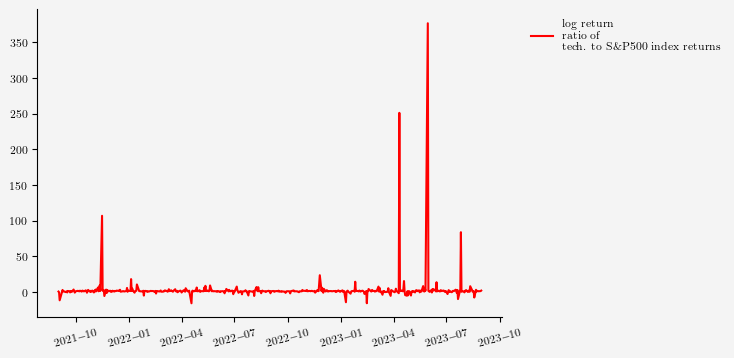

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
ax.plot(tech.index, tech_log_rets/sp_log_rets, color = "red", label = "log return \n ratio of \n tech. to S\&P500 index returns")
plt.legend(frameon = False, bbox_to_anchor=(1.04, 1))
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.savefig('evolution_logrets.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

In [ ]:
# describe log tech returns
tech_log_rets.describe()

count    502.000000
mean       0.000219
std        0.017371
min       -0.054949
25%       -0.010369
50%       -0.000289
75%        0.012034
max        0.079992
Name: Adj Close, dtype: float64

In [ ]:
# describe log S&P500 index returns
sp_log_rets.describe()

count    502.000000
mean      -0.000003
std        0.012389
min       -0.044199
25%       -0.007263
50%       -0.000282
75%        0.007478
max        0.053953
Name: Adj Close, dtype: float64

In [ ]:
np.corrcoef(tech_log_rets[1:], sp_log_rets[1:])

array([[1.        , 0.94376747],
       [0.94376747, 1.        ]])

## Cointegration

Cointegration, very similar to correlation, means that the ratio between two series will vary around a mean. For pairs trading to work between two timeseries, the expected value of the spread over time must converge to the mean, i.e. they should be cointegrated.
 $$ S_t = A_t - \beta B_t $$
 where $\beta$ is the cointegration factor, A and B the prices of two cointegrated assets.



In [ ]:
returns = returns[1:]

In [ ]:
# check that all is stationary and good
def stationarity_test(X, cutoff=0.01):
  # H_0 in adfuller is unit root exists (non-stationary)
  pvalue = adfuller(X)[1]
  if pvalue > cutoff:
    # only reports issue, when function is called an all is good nothing is printed
    print('The series ' + X.name +' likely non-stationary')

In [ ]:
for idx in range(0, returns.shape[1]-1):
  stationarity_test(returns.iloc[:, idx])

**How to make a pairs trade?**

Because two cointegrated time series drift towards and apart from each other, there will be times when the spread is high and times when the spread is low. We make a pairs trade by buying one security and selling another. This way, if both securities go down together or go up together, we neither make nor lose money — we are market neutral.

Going back to A and B above that follow $$ S_t = A_t - \beta B_t $$,

such that spread moves around its mean value, we make money on periodic deviations from its average. In order to do this we will watch for when A and B are far apart introducing a threshold for taking long and short positions on the spread, i.e $ \alpha_L $ and $ \alpha_S $.

Note that we always have a “hedged position”: a short position makes money if the security sold loses value, and a long position will make money if a security gains value, so we are immune to overall market movement. We only make or lose money if securities A and B move relative to each other.


**Using Data to find securities that behave like this**

The best way to do this is to start with securities you suspect may be cointegrated and perform a statistical test. If you just run statistical tests over all pairs, you will fall prey to multiple comparison bias.

*Multiple comparisons bias* is simply the fact that there is an increased chance to incorrectly generate a significant p-value when many tests are run, because we are running a lot of tests. If 100 tests are run on random data, we should expect to see 5 p-values below 0.05. If you are comparing *n* securities for cointegration, you will perform $ n(n-1)/2 $ comparisons, and you should expect to see many incorrectly significant p-values, which will increase as you increase. To avoid this, pick a small number of pairs you have reason to suspect might be cointegrated and test each individually. This will result in less exposure to multiple comparisons bias.


So let us try to find some securities that display cointegration. Let us work with a basket of US tech stocks in S&P500 Information Technology Index. These stocks operate in a similar segment and could have cointegrated prices. We scan through a list of securities and test for cointegration between all pairs. It returns a cointegration test score matrix, a p-value matrix, and any pairs for which the p-value was less than 0.05. This method is prone to multiple comparison bias and in practice the securities should be subject to a second verification step. Let us ignore this for the sake of this example.

*note* confounding variable issues ->  important to check for market involvement in any relationship you find

 Holm-Bonferroni method: [no assumption: independence or dependency of test statistics]

In [ ]:
def find_cointegrated_pairs(data, alpha):
  n = data.shape[1]
  score_matrix = np.zeros((n, n)) ; pvalue_matrix = np.ones((n, n))
  keys = data.keys() ; pairs = []
  # calculate cointegration and statistics
  for i in range(n):
    for j in range(i+1, n):
      S1 = data[keys[i]] ; S2 = data[keys[j]]
      result = coint(S1, S2)
      score = result[0] ; pvalue = result[1]
      score_matrix[i, j] = score ; pvalue_matrix[i, j] = pvalue

  # Holm-Bonferroni method
  indices = np.triu_indices(n, k=1)
  pvalues = pvalue_matrix[indices]
  m = len(pvalues)

  for i, element in enumerate(np.argsort(pvalues)):
    adjusted_significance = alpha / (m - i)
    if pvalues[element] < adjusted_significance:
      pairs.append((keys[indices[0][element]], keys[indices[1][element]]))
    else:
      break
  return score_matrix, pvalue_matrix, pairs

scores, pvalues, pairs = find_cointegrated_pairs(prices_train, 0.05)

In [ ]:
# the cointegrated pairs
print("# pairs:", len(pairs))
print(pairs)

# pairs: 1
[('LRCX', 'NXPI')]


In [ ]:
# heatmap to show p-values of the cointegration test between each pair of stocks
fig, ax = plt.subplots(figsize = (10, 10), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
sns.heatmap(pvalues, xticklabels = prices.columns, yticklabels = prices.columns, cmap = 'RdYlGn_r', mask = (pvalues == 1));
plt.savefig('heat.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)

Take a look at the prices of one pair, say the 1st pair, to make sure this actually makes sense.

In [ ]:
pair_index = 0 # pair_index = 28
np.array(pairs[pair_index])

array(['LRCX', 'NXPI'], dtype='<U4')

In [ ]:
A = np.array(pairs[pair_index])[0] ; B = np.array(pairs[pair_index])[1]
A_prices = prices[A] ; B_prices = prices[B]
spread = pd.DataFrame(A_prices - B_prices, columns = ["spread"])

A_prices_train = prices_train[A] ; B_prices_train = prices_train[B]
A_prices_test = prices_test[A]; B_prices_test = prices_test[B]
A_prices_val = prices_val[A]; B_prices_val = prices_val[B]
spread_train = pd.DataFrame(A_prices_train - B_prices_train)
spread_test = pd.DataFrame(A_prices_test - B_prices_test)
spread_val = pd.DataFrame(A_prices_val - B_prices_val)

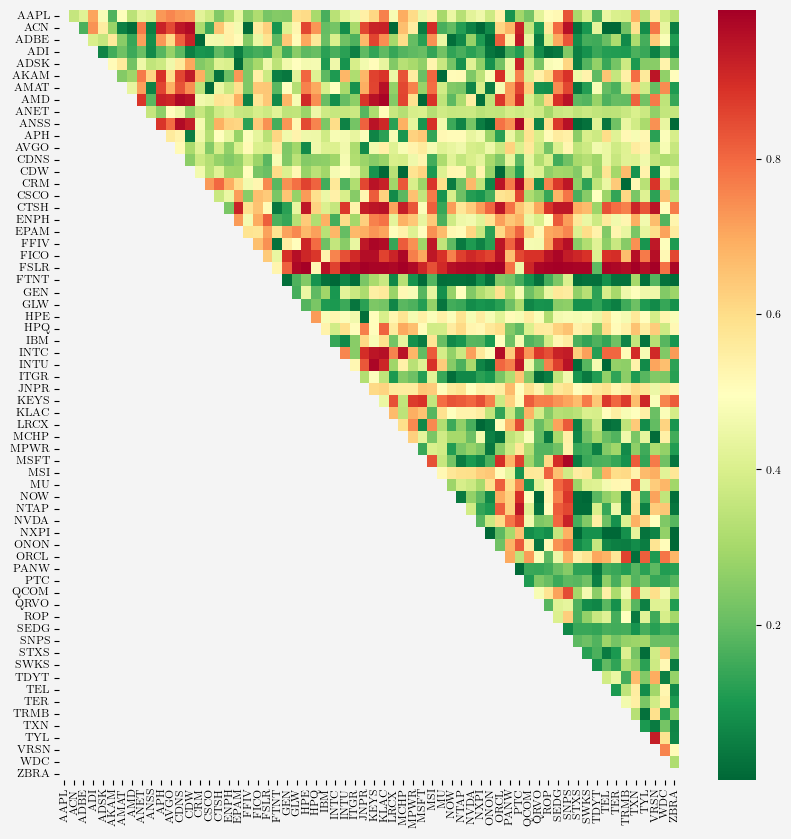

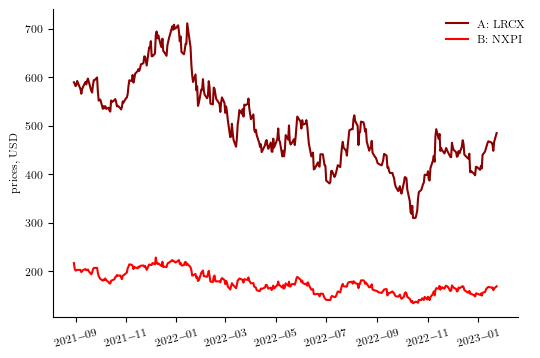

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.plot(prices_train.index, A_prices_train, color = "darkred", label = "A: LRCX")
ax.plot(prices_train.index, B_prices_train, color = "red", label = "B: NXPI")
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1)) ; plt.ylabel("prices, USD")
plt.savefig('coint_pair.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=True, dpi=1200)
plt.show()

In [ ]:
score, pvalue, _ = coint(A_prices_train, B_prices_train)
print(pvalue)

3.859256196514195e-06


Normalise the spread for consistency and some other statistical reasons:

In [ ]:
# normalize values
def normalise_array(x):
  x = np.array(x)
  return normalize(x.reshape(x.shape[0],-1), norm='max', axis=0) # return normalize(x.reshape(x.shape[0],-1), norm='max', axis=0).reshape(x.shape)

In [ ]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

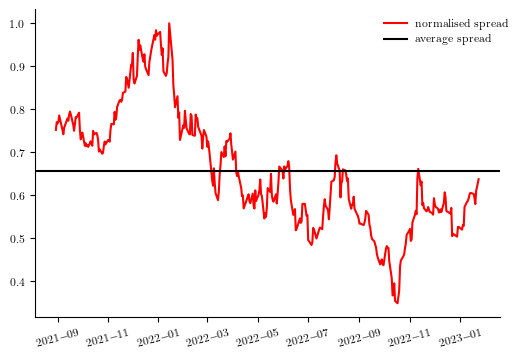

In [ ]:
# normalised spread
fig, ax = plt.subplots(figsize = (6, 4))

# normalised
ax.plot(prices_train.index, normalise_array(spread_train), color = "red", label = "normalised spread")
ax.axhline(normalise_array(spread_train).mean(), color='black', label = "average spread")

# z-score
#ax.plot(prices_train.index, zscore(spread), color = "red", label = "normalised spread")
#ax.axhline(zscore(spread).mean(), color='black', label = "average spread")

ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.savefig('norm_spread.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=True, dpi=1200)
plt.show()

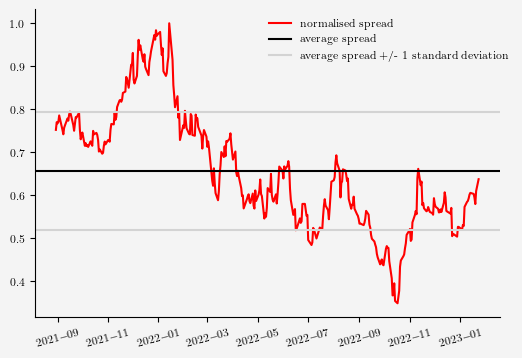

In [ ]:
# normalised spread
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
# normalised
ax.plot(prices_train.index, normalise_array(spread_train), color = "red", label = "normalised spread")
ax.axhline(normalise_array(spread_train).mean(), color='black', label = "average spread")
# threshold: mu ± sigma
ax.axhline(normalise_array(spread_train).std() + normalise_array(spread_train).mean(), color = "lightgrey", label = "average spread +/- 1 standard deviation") ; ax.axhline(-normalise_array(spread_train).std() + normalise_array(spread_train).mean(), color = "lightgrey")

# zscore
#ax.plot(prices_train.index, zscore(spread), color = "red", label = "normalised spread")
#ax.axhline(zscore(spread).mean(), color='black', label = "average spread")
#ax.axhline(1, color = "lightgrey") ; ax.axhline(-1, color = "lightgrey")

ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.savefig('norm_spread.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

It is easier to now observe the spread now moves around the mean, but sometimes is prone to large divergences from the mean, which we can take advantages of.

## Pairs Trading

Now that the basics of pair trading have been covered, and  co-integrated securities based on historical prices identified, the next step is to develop a trading signal.

First, recap the steps in developing a trading signal using data techniques:
- Collect reliable Data and clean Data
- Create features from data to identify a trading signal/logic
- Features can be moving averages or ratios of price data, correlations or more complex signals — combine these to create new features
- Generate a trading signal using these features, i.e which instruments are a buy, a sell or neutral

The aim is to create a signal telling us to buy or sell at the next instant in time, i.e., our prediction variable $Y$ is:
$$ Y = +1\ if \ buy, -1 \ if \ sell \ the \ ratio $$
$$ Y_t = Sign(Ratio_{t+1} - Ratio_{t}) $$

Note we do not need to predict actual stock prices, or even actual value of ratio (though we could), just the direction of next move in ratio.

*Step 1* Data

*Step 2* Feature engineering

We want to predict the direction of ratio move. We have seen that our two securities are cointegrated so the ratio tends to move around and revert back to the mean. It seems our features should be certain measures for the mean of the ratio, the divergence of the current value from the mean to be able to generate our trading signal.
Let us use the following features:
- 60 day Moving Average of Ratio: Measure of rolling mean
- 5 day Moving Average of Ratio: Measure of current value of mean
- 60 day Standard Deviation
- z score: (5d MA — 60d MA) /60d SD

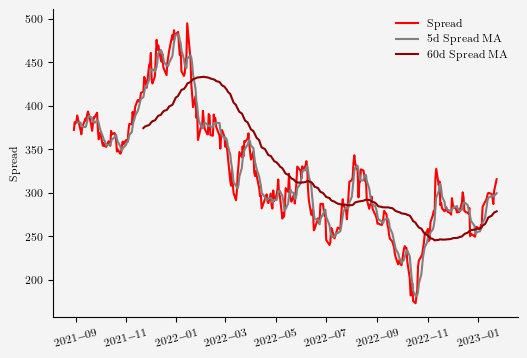

In [ ]:
spread_train_mavg5 = spread_train.rolling(window=5, center=False).mean()
spread_train_mavg60 = spread_train.rolling(window=60, center=False).mean()
spread_train_std60 = spread_train.rolling(window=60, center=False).std()
spread_train_zscore = (spread_train_mavg5 - spread_train_mavg60) / spread_train_std60

fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
ax.plot(spread_train.index, spread_train.values, color = "red")
ax.plot(spread_train_mavg5.index, spread_train_mavg5.values, color = "grey")
ax.plot(spread_train_mavg60.index, spread_train_mavg60.values, color = "darkred")
plt.legend(['Spread', '5d Spread MA', '60d Spread MA'], frameon=False)
plt.ylabel('Spread')

ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.savefig('features.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=True, dpi=1200)
plt.show()

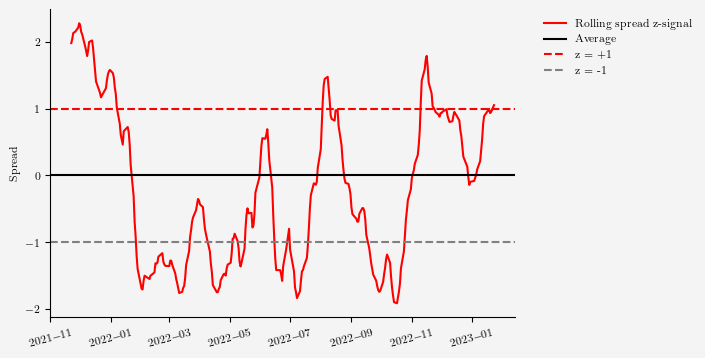

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
ax.plot(spread_train.index, spread_train_zscore.values, color = "red", label = 'Rolling spread z-signal')
ax.axhline(0, color='black', label = 'Average')
ax.axhline(1.0, color='red', linestyle='--', label = 'z = +1')
ax.axhline(-1.0, color='grey', linestyle='--', label = 'z = -1')
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.ylabel('Spread')

ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.savefig('zmove.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

*Step 3* Model selection and Trade

Let us start with a really simple model. Looking at the z-score chart, we can see that whenever the z-score feature gets too high, or too low, it tends to revert back. Let us use +1/-1 as our thresholds for too high and too low, then we can use the following model to generate a trading signal:
- go long spread (buy A, sell B) when $s_t < \alpha_L$. Expect spread to increase
- go short spread (sell A, buy B) when $s_t > \alpha_S$. Expect spread to decrease

Finally, let us see how our model actually does on real data? Let us see what this signal looks like on actual ratios

In [ ]:
buy = spread_train_zscore[60:].copy() ; sell = spread_train_zscore[60:].copy()

buy[spread_train_zscore[60:] > -1] = np.nan # buy[spread_zscore[60:] < -1] = buy ; buy[spread_zscore[60:] > -1] = np.nan
sell[spread_train_zscore[60:] < 1] = np.nan # sell[spread_zscore[60:] > 1] = sell ; sell[spread_zscore[60:] < 1] = np.nan

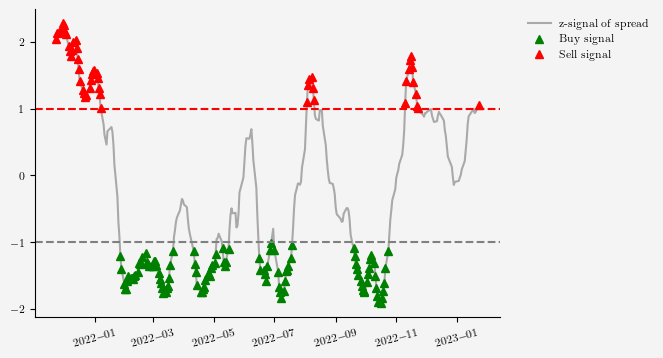

In [ ]:
# Plot the ratios and buy and sell signals from z score
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(spread_train_zscore[60:], color = "darkgrey", label = 'z-signal of spread')

# the signals
plt.plot(buy, color='g', linestyle='None', marker='^', label = 'Buy signal')
plt.plot(sell, color='r', linestyle='None', marker='^', label = 'Sell signal')

#x1, x2, y1, y2 = plt.axis()
#plt.axis((x1, x2, zscore(spread).min(), zscore(spread).max()))
ax.axhline(1.0, color='red', linestyle='--') #, label = 'z = +1')
ax.axhline(-1.0, color='grey', linestyle='--') #, label = 'z = -1')

ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.savefig('signal.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

The signal seems reasonable, we seem to sell the ratio (red dots) when it is high or increasing and buy it back when it's low (green dots) and decreasing. What does that mean for actual stocks that we are trading? Let’s take a look:

Let us see what kind of profits this signal can generate. We can make a simple backtester which buys 1 ratio (buy 1 S1 stock and sell ratio x S2 stock) when ratio is low, sell 1 ratio (sell 1 S1 stock and buy ratio x S2 stock) when it is high and calculate PnL of these trades.

In [ ]:
# Simple strategy
def trade(A_prices, B_prices, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratio = A_prices / B_prices
    ma1 = ratio.rolling(window = window1, center = False).mean()
    ma2 = ratio.rolling(window = window2, center = False).mean()
    std = ratio.rolling(window = window2, center = False).std()
    zscore = (ma1 - ma2) / std

    # Simulate trading
    # Start with no money and no positions
    money = 0 ; countA = 0 ; countB = 0
    for i in range(len(ratio)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += A_prices[i] - B_prices[i] * ratio[i] # price A - price B * ratio
            countA -= 1 # go short 1 unit of A
            countB += ratio[i] # go long β units of B

        # Buy long if the z-score is < -1
        elif zscore[i] < -1:
            money -= A_prices[i] - B_prices[i] * ratio[i]
            countA += 1 # go long 1 unit of A
            countB -= ratio[i] # go short β units of B

        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += A_prices[i] * countA + B_prices[i] * countB
            countA = 0
            countB = 0
    return money

In [ ]:
trade(A_prices_train, B_prices_train, 5, 60)

1807.2136257402892

In [ ]:
trade(A_prices_test, B_prices_test, 5, 60)

0.0

In [ ]:
# Simple strategy
def trade(A_prices, B_prices, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0, pd.DataFrame(), np.nan, np.nan
    # COMPUTE SIGNAL
    spread = A_prices - B_prices
    beta = stats.linregress(A_prices, B_prices)[0]
    ma1 = spread.rolling(window = window1, center = False).mean()
    ma2 = spread.rolling(window = window2, center = False).mean()
    std = spread.rolling(window = window2, center = False).std()
    zscore = (ma1 - ma2) / std
    # SIMULATE TRADING
    # start with no money and no positions, initialise arrays
    money = 0 ; countA = 0 ; countB = 0;
    ret = pd.DataFrame(np.zeros(len(spread)), index = spread.index)
    log_ret = pd.DataFrame(np.zeros(len(spread)), index = spread.index)
    profit = pd.DataFrame(index = spread.index)
    # for each instance of spread
    for i in range(len(spread)):
      if i > 1 and (countA != 0 or countB != 0):
        weightA = (countA * A_prices[i-1])/(abs(countA * A_prices[i-1]) + abs(countB * B_prices[i-1]))
        weightB = (countB * B_prices[i-1])/(abs(countA * A_prices[i-1]) + abs(countB * B_prices[i-1]))
        ret.loc[spread.index[i], 0] = weightA * (A_prices[i] / A_prices[i-1] - 1) + weightB * (B_prices[i] / B_prices[i-1] - 1)
        log_ret.loc[spread.index[i], 0] = np.log(1 + ret.loc[spread.index[i], 0])
      if i == 0 or (countA < 0 and zscore[i] <= 0) or (countA > 0 and zscore[i] >= 0) or i == (len(spread)-1):
        # clear positions
        money += countA * A_prices[i] + countB * B_prices[i]
        countA = 0 ; countB = 0
        profit.loc[spread.index[i], 0] = money
        if i == (len(spread)-1): break
      if zscore[i] > 1:
        # go short spread if the z-score is > 1
        money += A_prices[i] - beta * B_prices[i]
        countA -= 1 # go short 1 unit of A
        countB += beta # go long β units of B
      elif zscore[i] < -1:
        # go long spread if the z-score is < -1
        money -= A_prices[i] - beta * B_prices[i]
        countA += 1 # go long 1 unit of A
        countB -= beta # go short β units of B
    # CALCULATE PERFORMANCE METRICS OF STRATEGY
    sharpe_ratio = (252 * log_ret.mean()) / ((252 ** 0.5) * log_ret.std())
    portfolio = (1 + ret).cumprod()
    max = portfolio.cummax() ; drawdown = portfolio / max - 1
    max_drawdown = 100* drawdown.cummin().min()
    roi = float(100* (portfolio.iloc[-1]/portfolio.iloc[1] - 1))
    return money, portfolio, sharpe_ratio.values[0], max_drawdown.values[0], roi

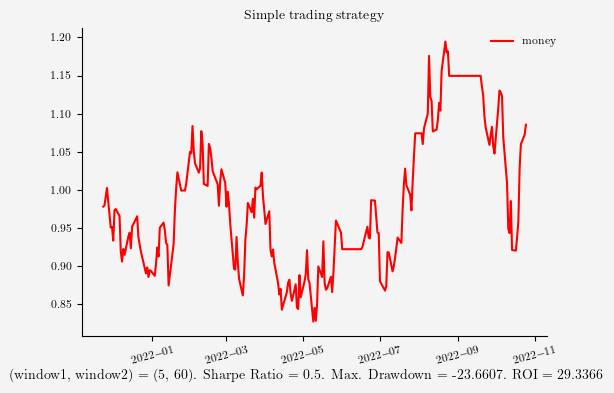

In [ ]:
w1 = 5 ; w2 = 60
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_train, B_prices_train, w1, w2)

fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(portfolio[60:-60], color = "red", label = 'money')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("Simple trading strategy")
text = fig.text(0.50, 0.0,
                f"(window1, window2) = {w1, w2}. Sharpe Ratio = {np.round(sharpe_ratio, 4)}. Max. Drawdown = {np.round(max_drawdown, 4)}. ROI = {np.round(roi, 4)}",
                horizontalalignment='center', wrap=True, fontsize = 10)
plt.savefig('port.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

*Step 4* Backtest on Test data

PnL on test data

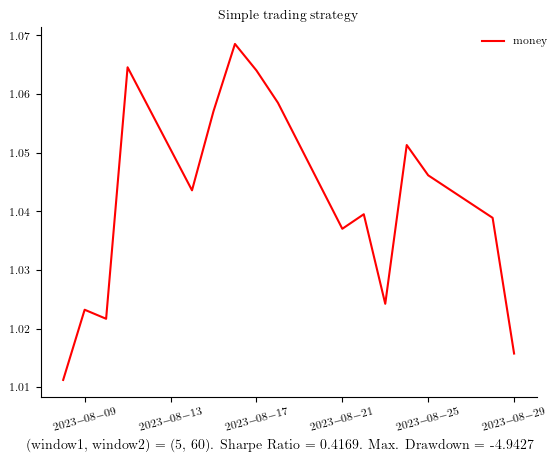

Sharpe ratio:  0.41688245087755466
Maximum drawdown:  -4.94265425837318


In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_test, B_prices_test, w1, w2)

fig, ax = plt.subplots()
plt.plot(portfolio[60:], color = "red", label = 'money')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("Simple trading strategy")
text = fig.text(0.50, 0.0,
                f"(window1, window2) = {w1, w2}. Sharpe Ratio = {np.round(sharpe_ratio, 4)}. Max. Drawdown = {np.round(max_drawdown, 4)}",
                horizontalalignment='center', wrap=True, fontsize = 10)
plt.savefig('port.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=True, dpi=1200)
plt.show()

print("Sharpe ratio: ", sharpe_ratio)
print("Maximum drawdown: ", max_drawdown)

*check on all possible pairs: STRATEGY = TRADE ON ALL COINTEGRATED PAIRS, NOT JUST ONE EXAMPLE*


In [ ]:
def trade_all(pairs, prices, window1, window2, train_spec):
  total_money = 0
  # get the pair
  for pair in range(len(pairs)):
    A = np.array(pairs[pair])[0] ; B = np.array(pairs[pair])[1]
    # A = prices[A] ; B = prices[B]
    # A_train, A_test = train_test_split(A, test_size = 0.3, shuffle = False)
    # B_train, B_test = train_test_split(B, test_size = 0.3, shuffle = False)

    if train_spec == "train":
      # use train data
      A_train = prices_train[A]
      B_train = prices_train[B]
      res = trade(A_train, B_train, window1, window2)[0] # res = trade(A_train, B_train, window1, window2)
    else:
      # OOS/backtesting, whatever name you fancy
      A_test = prices_test[A]
      B_test = prices_test[B]
      res = trade(A_test, B_test, window1, window2)[0] # res = trade(A_test, B_test, window1, window2)
    total_money += res
  return total_money

In [ ]:
trade_all(pairs, prices, 5, 60, "train")

4050.2043928895428

In [ ]:
trade_all(pairs, prices, 5, 60, "test")

-50.26221702708153

**Now we can optimize further by changing our moving average windows, by changing the thresholds for buy/sell and exit positions etc and check for performance improvements on validation data.
We could also try more sophisticated models like Logisitic Regression, SVM etc to make our 1/-1 predictions**

*Avoid Overfitting*
Before ending the discussion, we’d like to give special mention to overfitting. Overfitting is the most dangerous pitfall of a trading strategy. An overfit algorithm may perform wonderfully on a backtest but fails miserably on new unseen data — this mean it has not really uncovered any trend in data and no real predictive power. Let’s take a simple example.
In our model, we used rolling parameter estimates and may wish to optimize window length. We may decide to simply iterate over all possible, reasonable window length and pick the length based on which our model performs the best . Below we write a simple loop to to score window lengths based on pnl of training data and find the best one.

In [ ]:
# find the window length 0-254 that gives the highest returns using this strategy
length_scores = [trade(A_prices_train, B_prices_train, 5, l)[0] for l in range(255)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 134


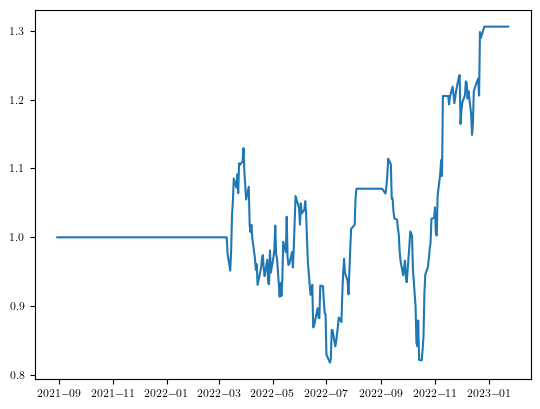

Sharpe ratio:  0.5871257331563886
Maximum drawdown:  -27.581068970787715


In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_train, B_prices_train, 5, best_length)
plt.plot(portfolio)
plt.show()
print("Sharpe ratio: ", sharpe_ratio)
print("Maximum drawdown: ", max_drawdown)

Now we check the performance of our model on validation data and we find that this window length is far from optimal! This is because our original choice was clearly overfitted to the sample data.

In [ ]:
# Find the returns for validation data using what we think is the best window length
length_scores2 = [trade(A_prices_val, B_prices_val, 5, l)[0] for l in range(255)]
print(best_length, 'day window:', length_scores2[best_length])
# Find the best window length based on this dataset and the returns using this window length
best_length2 = np.argmax(length_scores2)
print(best_length2, 'day window:', length_scores2[best_length2])

134 day window: 0.0
22 day window: 139.55639342706922


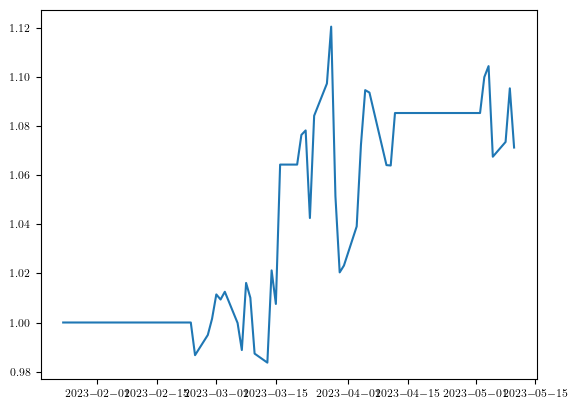

Sharpe ratio:  0.8876933950987428
Maximum drawdown:  -8.929670999653162


In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_val, B_prices_val, 5, best_length2)
plt.plot(portfolio)
plt.show()
print("Sharpe ratio: ", sharpe_ratio)
print("Maximum drawdown: ", max_drawdown)

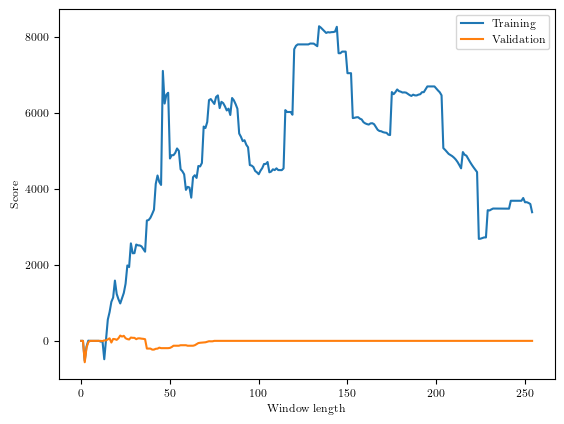

In [ ]:
plt.plot(length_scores) ; plt.plot(length_scores2)
plt.xlabel('Window length') ; plt.ylabel('Score') ; plt.legend(['Training', 'Validation'])
plt.show()

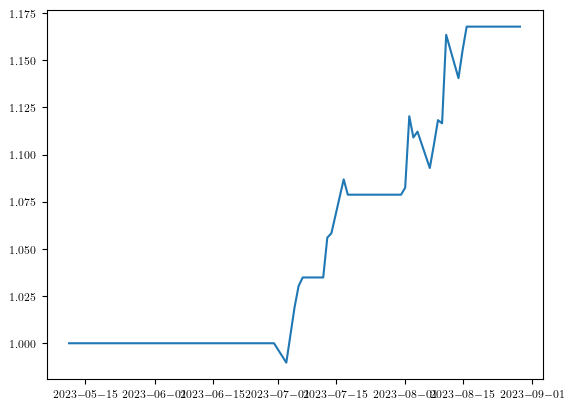

Sharpe ratio:  3.56370813598887
Maximum drawdown:  -2.4496534875876774


In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_test, B_prices_test, 5, best_length2)
plt.plot(portfolio)
plt.show()
print("Sharpe ratio: ", sharpe_ratio)
print("Maximum drawdown: ", max_drawdown)

To avoid overfitting, we can use economic reasoning or the nature of our algorithm to pick our window length. **We can also use Kalman filters**, which do not require us to specify a length.

In practice one should use more sophisticated statistics, some of which are listed here
- Hurst exponent
- Half-life of mean reversion inferred from an Ornstein-Uhlenbeck process
- Kalman filters

## LSTM - trying & failing (working but not profitable?)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(999)

In [ ]:
# Set the number of lags in the univariate setting
n_lags = 2 ; n_variables = 1
# Scale the data
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(spread_train), index = spread_train.index, columns=['spread_zscore'])
test = pd.DataFrame(scaler.transform(spread_test), index = spread_test.index, columns=['spread_zscore'])
val = pd.DataFrame(scaler.transform(spread_val), index = spread_val.index, columns=['spread_zscore'])
# TRAIN DATASET
# Reform into a supervised learning problem
df = train.copy()
for lag in range(1, n_lags+1):
    df['spread_zscore_L%d'%lag] = df['spread_zscore'].shift(lag)
df.dropna(inplace = True)
X_train = df.iloc[:,1:(n_lags+1)]
y_train = df.iloc[:,0:1]
# Reshape to a 3-dimensional tensor: training data
X_train_RNN = X_train.values.reshape(-1, n_lags, n_variables)
y_train_RNN = y_train.values
print("(Rows, Time-steps, Variables):", X_train_RNN.shape)
# TEST DATASET
# Reform into a supervised learning problem
df = test.copy()
for lag in range(1, n_lags+1):
    df['spread_zscore_L%d'%lag] = df['spread_zscore'].shift(lag)
df.dropna(inplace = True)
X_test = df.iloc[:,1:(n_lags+1)]
y_test = df.iloc[:,0:1]
# Reshape to a 3-dimensional tensor
X_test_RNN = X_test.values.reshape(-1, n_lags, n_variables)
y_test_RNN = y_test.values
print("(Rows, Time-steps, Variables):", X_test_RNN.shape)
# VALIDATION DATASET
# Reform into a supervised learning problem
df = val.copy()
for lag in range(1, n_lags+1):
    df['spread_zscore_L%d'%lag] = df['spread_zscore'].shift(lag)
df.dropna(inplace = True)
X_val = df.iloc[:,1:(n_lags+1)]
y_val = df.iloc[:,0:1]
# Reshape to a 3-dimensional tensor
X_val_RNN = X_val.values.reshape(-1, n_lags, n_variables)
y_val_RNN = y_val.values
print("(Rows, Time-steps, Variables):", X_val_RNN.shape)

(Rows, Time-steps, Variables): (350, 2, 1)
(Rows, Time-steps, Variables): (74, 2, 1)
(Rows, Time-steps, Variables): (73, 2, 1)


In [ ]:
# create and fit the LSTM network
LSTM_model = Sequential()
LSTM_model.add(LSTM(5, input_shape=(X_train_RNN.shape[1], X_train_RNN.shape[2]), activation='tanh', return_sequences=False))
LSTM_model.add(Dense(1, activation='linear'))
LSTM_model.compile(loss='mean_squared_error', optimizer='adam')
LSTM_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


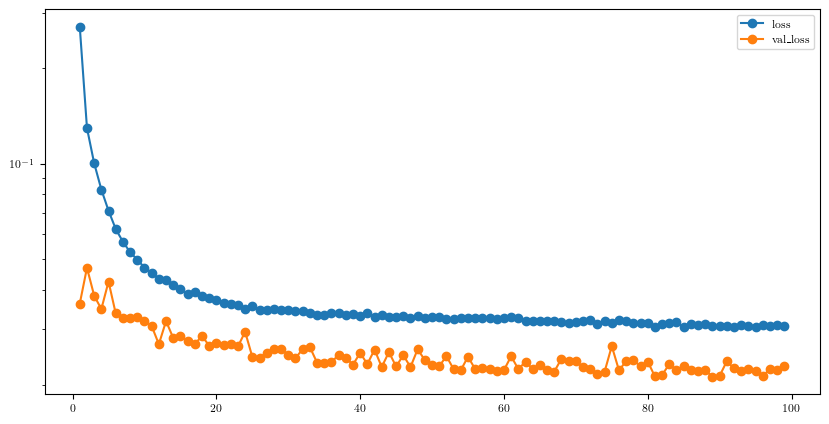

In [ ]:
his = LSTM_model.fit(X_train_RNN, y_train_RNN, batch_size=1, epochs=100, verbose=0, validation_data=(X_val_RNN, y_val_RNN))
history = pd.DataFrame(his.history)
fig, ax1 = plt.subplots(1,1, figsize=(10,5))
ax1.plot(history.iloc[1:][['loss', 'val_loss']], marker='o', label=history.columns)
ax1.set_yscale('log')
plt.legend()
plt.show()

3/3 [==============================] - 0s 4ms/step


<ipython-input-145-a339f1ff150e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_val['pred_zscore'] = LSTM_model.predict(X_val_RNN)


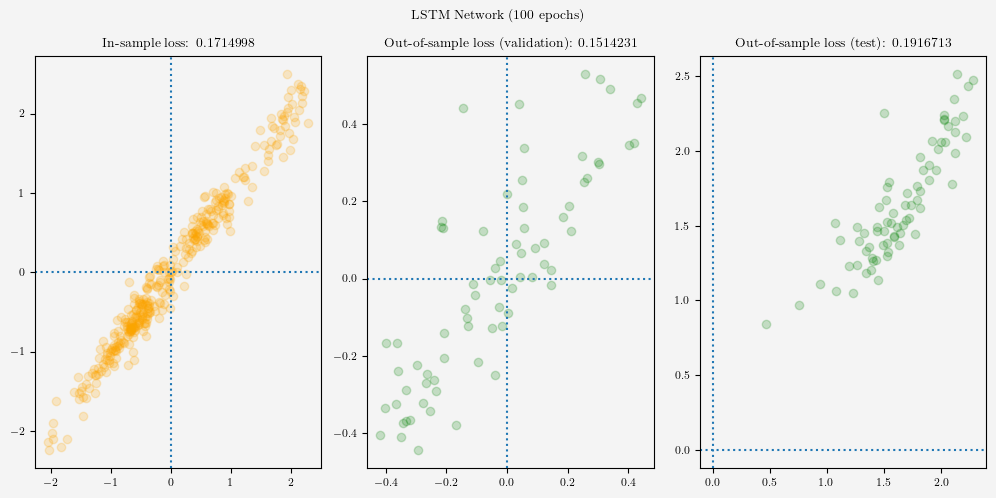

In [ ]:
# Scatter plot of predictions VS target
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10,5), facecolor='#f4f4f4')
ax1.set_facecolor("#f4f4f4") ; ax2.set_facecolor("#f4f4f4") ; ax3.set_facecolor("#f4f4f4")
y_train['pred_zscore'] = LSTM_model.predict(X_train_RNN)
ax1.scatter(y_train['pred_zscore'], y_train['spread_zscore'], alpha=0.2, color='orange');
ax1.axhline(0, linestyle=':')
ax1.axvline(0, linestyle=':');
rmse_train = np.sqrt(mean_squared_error(y_train['spread_zscore'].values, y_train['pred_zscore'].values))
ax1.set_title("In-sample loss: {0:1.7f}".format(rmse_train));

y_val['pred_zscore'] = LSTM_model.predict(X_val_RNN)
ax2.scatter(y_val['pred_zscore'], y_val['spread_zscore'], alpha=0.2, color='green');
ax2.axhline(0, linestyle=':')
ax2.axvline(0, linestyle=':');
rmse_val = np.sqrt(mean_squared_error(y_val['spread_zscore'].values, y_val['pred_zscore'].values))
ax2.set_title("Out-of-sample loss (validation): {0:1.7f}".format(rmse_val));

y_test['pred_zscore'] = LSTM_model.predict(X_test_RNN)
ax3.scatter(y_test['pred_zscore'], y_test['spread_zscore'], alpha=0.2, color='green');
ax3.axhline(0, linestyle=':')
ax3.axvline(0, linestyle=':');
rmse_test = np.sqrt(mean_squared_error(y_test['spread_zscore'].values, y_test['pred_zscore'].values))
ax3.set_title("Out-of-sample loss (test): {0:1.7f}".format(rmse_test));

fig.suptitle('LSTM Network (%d epochs)'%len(history))
plt.tight_layout()
plt.savefig('performanceLSTM.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

In [ ]:
# invert predictions
y_train['pred'] = scaler.inverse_transform(y_train[['pred_zscore']].values)
y_train['spread'] = scaler.inverse_transform(y_train[['spread_zscore']].values)
y_val['pred'] = scaler.inverse_transform(y_val[['pred_zscore']].values)
y_val['spread'] = scaler.inverse_transform(y_val[['spread_zscore']].values)
y_test['pred'] = scaler.inverse_transform(y_test[['pred_zscore']].values)
y_test['spread'] = scaler.inverse_transform(y_test[['spread_zscore']].values)
# calculate root mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train['spread'].values, y_train['pred'].values)) # trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (rmse_train))
rmse_val = np.sqrt(mean_squared_error(y_val['spread'].values, y_val['pred'].values))
print('Validation Score: %.2f RMSE' % (rmse_val))
rmse_test = np.sqrt(mean_squared_error(y_test['spread'].values, y_test['pred'].values)) # testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (rmse_test))

Train Score: 11.67 RMSE
Validation Score: 10.30 RMSE
Test Score: 13.04 RMSE


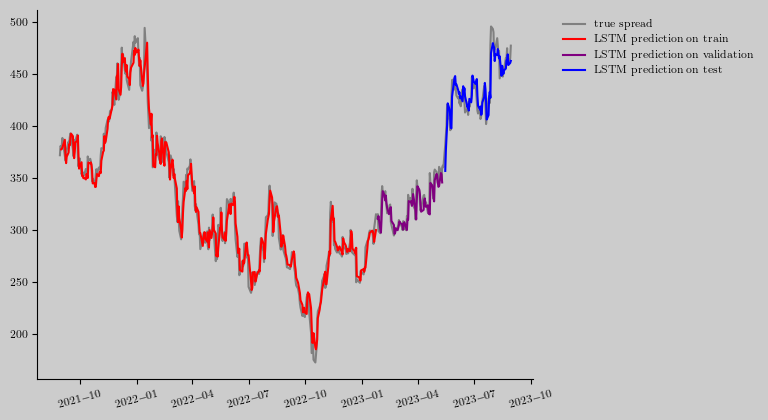

In [ ]:
# plot baseline and predictions
fig, ax = plt.subplots(facecolor='#cccccc')

ax.plot(spread.index, spread, color = "grey", label = "true spread")
ax.plot(y_train.index, y_train["pred"], color = "red", label = "LSTM prediction on train")
ax.plot(y_val.index, y_val["pred"], color = "purple", label = "LSTM prediction on validation")
ax.plot(y_test.index, y_test["pred"], color = "blue", label = "LSTM prediction on test")

plt.legend(frameon = False, bbox_to_anchor=(1.04, 1))
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
ax.set_facecolor("#cccccc")
plt.savefig('evolution.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)

plt.show()

generate the signal based on:https://iaqf.org/resources/Documents/2023%20Student%20Competition/QCF_Georgia%20Tech.pdf

$$ \Delta_{t+1} = \frac{\hat{S_{t+1}} - S_t}{S_t} $$

$$ P_{t+1} =
  \begin{cases}
    long \ spread,      & \quad \Delta_{t+1} > \alpha_s\\
    short \ spread,  & \quad \Delta_{t+1} < \alpha_s
  \end{cases}
$$

In [ ]:
y_train["spread_change"] = (y_train["spread"] - y_train["spread"].shift(1)) / y_train["spread"].shift(1)
y_val["spread_change"] = (y_val["spread"] - y_val["spread"].shift(1)) / y_val["spread"].shift(1)
y_test["spread_change"] = (y_test["spread"] - y_test["spread"].shift(1)) / y_test["spread"].shift(1)
y_train["delta"] = (y_train["pred"] - y_train["spread"].shift(1)) / y_train["spread"].shift(1)
y_val["delta"] = (y_val["pred"] - y_val["spread"].shift(1)) / y_val["spread"].shift(1)
y_test["delta"] = (y_test["pred"] - y_test["spread"].shift(1)) / y_test["spread"].shift(1)

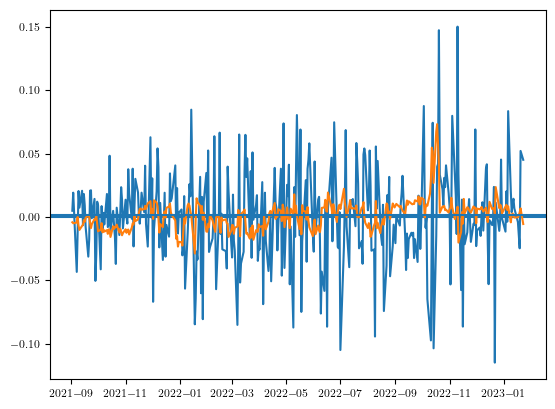

In [ ]:
plt.plot(y_train["spread_change"]) ; plt.axhline(y_train["spread_change"].mean())
plt.plot(y_train["delta"]) ; plt.axhline(y_train["delta"].mean())
plt.show()

**WOW**:
the git repository to the Sartmento & Harta (https://premio-vidigal.inesc.pt/pdf/SimaoSarmentoMSc-resumo.pdf):


https://github.com/simaomsarmento/PairsTrading/blob/master/classes/class_ForecastingTrader.py

--> life changing

In [ ]:
# thresholds -- percentiles
alpha_short = np.percentile(
    y_train["spread_change"][y_train["spread_change"] < 0], 50)
alpha_long = np.percentile(
    y_train["spread_change"][y_train["spread_change"] > 0], 50)

In [ ]:
# thresholds -- percentiles
alpha_short = np.percentile(
    y_train["spread_change"][y_train["spread_change"] < 0], 100 - best_percentile)
alpha_long = np.percentile(
    y_train["spread_change"][y_train["spread_change"] > 0], best_percentile)

NameError: ignored

In [ ]:
# LSTM quantiles trading strategy
def trade_LSTM(A_prices, B_prices, delta, alpha_short, alpha_long):
    # PRELIMINARIES
    delta = delta[1:]
    A_prices = A_prices[n_lags+1:]
    B_prices = B_prices[n_lags+1:]
    beta = stats.linregress(A_prices_train, B_prices_train)[0]
    # start with no money and no positions
    money = 0 ; countA = 0 ; countB = 0;
    ret = pd.DataFrame(np.zeros(len(delta)), index = delta.index)
    log_ret = pd.DataFrame(np.zeros(len(delta)), index = delta.index)
    profit = pd.DataFrame(index = delta.index)
    # SIMULATE TRADING
    # for each instance of change in spread
    for i in range(len(delta)):
      if i > 1 and (countA != 0 or countB != 0):
        weightA = (countA * A_prices[i-1]) / (abs(countA * A_prices[i-1]) + abs(countB * B_prices[i-1]))
        weightB = (countB * B_prices[i-1]) / (abs(countA * A_prices[i-1]) + abs(countB * B_prices[i-1]))
        ret.loc[delta.index[i], 0] = weightA * (A_prices[i] / A_prices[i-1] - 1) + weightB * (B_prices[i] / B_prices[i-1] - 1)
        log_ret.loc[delta.index[i], 0] = np.log(1 + ret.loc[delta.index[i], 0])
      if i == 0 or (countA < 0 and delta[i] >= 0) or (countA > 0 and delta[i] <= 0) or i == (len(delta)-1):
        # clear positions
        money += countA * A_prices[i] + countB * B_prices[i]
        countA = 0 ; countB = 0
        if i == (len(spread)-1): break
      if delta[i] < alpha_short:
        # go short the spread if the expected spread change is < alpha_short
        money += A_prices[i] - beta * B_prices[i]
        countA -= 1 # go short 1 unit of A
        countB += beta # go long β units of B
      elif delta[i] > alpha_long:
         # go long the spread if the expected spread change is > alpha_long
         money -= A_prices[i] - beta * B_prices[i]
         countA += 1 # go long 1 unit of A
         countB -= beta # go short β units of B
    # CALCULATE PERFORMANCE METRICS OF STRATEGY
    sharpe_ratio = (252 * log_ret.mean()) / ((252 ** 0.5) * log_ret.std())
    portfolio = (1 + ret).cumprod()
    max = portfolio.cummax() ; drawdown = portfolio / max - 1
    max_drawdown = 100* drawdown.cummin().min()
    roi = float(100 * (portfolio.iloc[-1]/portfolio.iloc[1] - 1))
    return money, portfolio, sharpe_ratio.values[0], max_drawdown.values[0], roi

In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade_LSTM(A_prices_train, B_prices_train, y_train["delta"], alpha_short, alpha_long)

NameError: ignored

In [ ]:
# old
money = []
for i in range(2, 101):
    alpha_short = np.percentile(y_train["spread_change"][y_train["spread_change"]<0], 100 - i); alpha_long = np.percentile(y_train["spread_change"][y_train["spread_change"]>0], i)
    money.append(trade_LSTM(A_prices_train, B_prices_train, y_train["delta"], alpha_short, alpha_long)[0])
best_percentile = np.argmax(money)
print ('Best percentile:', best_percentile)

Best percentile: 0


In [ ]:
alpha_short = np.percentile(y_test["spread_change"][y_test["spread_change"] < 0], 100 - best_percentile)
alpha_long = np.percentile(y_test["spread_change"][y_test["spread_change"] > 0], best_percentile)

In [ ]:
roi = []
for i in range(1, 100):
    alpha_short = np.percentile(y_train["spread_change"][y_train["spread_change"]<0], 100 - i); alpha_long = np.percentile(y_train["spread_change"][y_train["spread_change"]>0], i)
    roi.append(trade_LSTM(A_prices_val, B_prices_val, y_val["delta"], alpha_short, alpha_long)[4])
best_percentile = 1 + np.argmax(roi)
print('Best percentile:', best_percentile)

alpha_short = np.percentile(y_train["spread_change"][y_train["spread_change"] < 0], 100 - best_percentile)
alpha_long = np.percentile(y_train["spread_change"][y_train["spread_change"] > 0], best_percentile)

Best percentile: 6


In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade_LSTM(A_prices_test, B_prices_test, y_test["delta"], alpha_short, alpha_long)

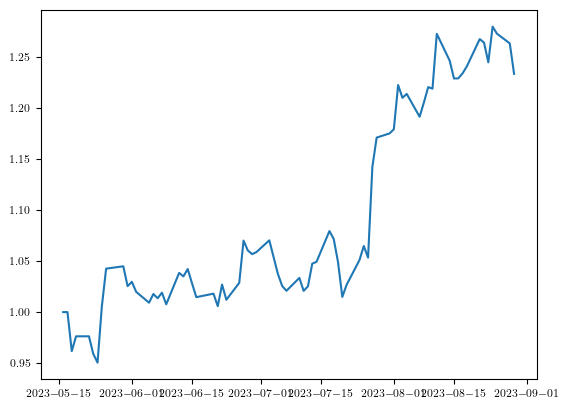

Sharpe ratio:  2.2271830172050406
Maximum drawdown:  -5.983572194098896
ROI:  23.375442746172137


In [ ]:
plt.plot(portfolio)
plt.show()
print("Sharpe ratio: ", sharpe_ratio)
print("Maximum drawdown: ", max_drawdown)
print("ROI: ", roi)

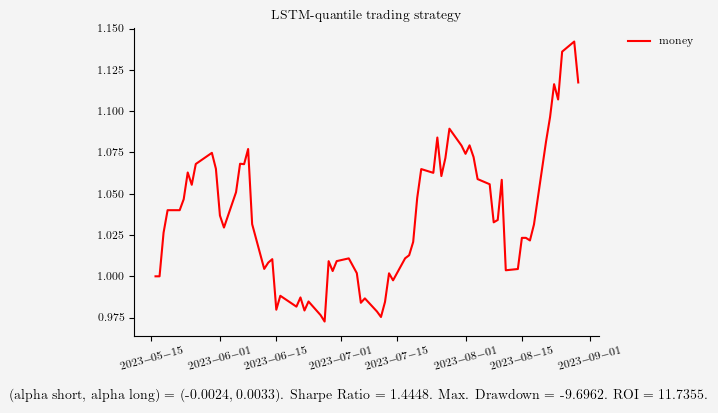

In [ ]:
money, portfolio, sharpe_ratio, max_drawdown, roi = trade_LSTM(A_prices_train, B_prices_train, y_test["delta"], alpha_short, alpha_long)
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(portfolio, color = "red", label = 'money')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("LSTM-quantile trading strategy")
text = fig.text(0.50, -0.05,
                f"(alpha short, alpha long) = {np.round(alpha_short, 4), np.round(alpha_long, 4)}. Sharpe Ratio = {np.round(sharpe_ratio, 4)}. Max. Drawdown = {np.round(max_drawdown, 4)}. ROI = {np.round(roi, 4)}.",
                horizontalalignment='center', wrap=True, fontsize = 10)
plt.savefig('port.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

## comparing

In [ ]:
# SIMPLE
w1 = 5 ; w2 = 60
money, portfolio, sharpe_ratio, max_drawdown, roi = trade(A_prices_test, B_prices_test, w1, w2)
print("Sharpe ratio: ", np.round(sharpe_ratio, 4))
print("Maximum drawdown: ", np.round(max_drawdown, 4))
print("ROI: ", np.round(roi, 4))

incr_per = ((portfolio.diff()>0).sum())/(len(portfolio) - 1)
incr_days = (portfolio.diff()>0).sum()
print("percentage of days in period where portfolio increased in value:", float(np.round(incr_per*100, 4)))
print("number of days in period where portfolio increased in value:", float(np.round(incr_days, 4)))

spread = A_prices_test - B_prices_test ; beta = stats.linregress(A_prices_test, B_prices_test)[0]
ma1 = spread.rolling(window = w1, center = False).mean() ; ma2 = spread.rolling(window = w2, center = False).mean() ; std = spread.rolling(window = w2, center = False).std()
zscore = (ma1 - ma2) / std

print("no. shorts:", (zscore > 1).sum())
print("no. long:", (zscore < -1).sum())
print("no. trades:", (zscore > 1).sum() + (zscore < -1).sum())

Sharpe ratio:  0.4169
Maximum drawdown:  -4.9427
ROI:  1.5729
percentage of days in period where portfolio increased in value: 9.3333
number of days in period where portfolio increased in value: 7.0
no. shorts: 8
no. long: 0
no. trades: 8


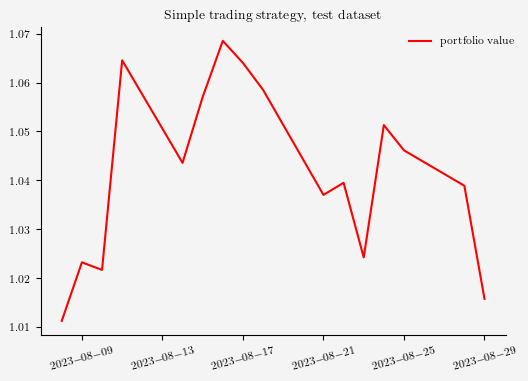

In [ ]:
# plot
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(portfolio[60:], color = "red", label = 'portfolio value')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("Simple trading strategy, test dataset")
plt.savefig('portSimpleTest.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

In [ ]:
# LSTM-quantile based
money_LSTM, portfolio_LSTM, sharpe_ratio_LSTM, max_drawdown_LSTM, roi_LSTM = trade_LSTM(A_prices_test, B_prices_test, y_test["delta"], alpha_short, alpha_long)
print("Sharpe ratio: ", np.round(sharpe_ratio_LSTM, 4))
print("Maximum drawdown: ", np.round(max_drawdown_LSTM, 4))
print("ROI: ", np.round(roi_LSTM, 4))

incr_per_LSTM = ((portfolio_LSTM.diff()>0).sum())/(len(portfolio_LSTM) - 1)
incr_days_LSTM = (portfolio_LSTM.diff()>0).sum()
print("percentage of days in period where portfolio increased in value:", float(np.round(incr_per_LSTM*100, 4)))
print("number of days in period where portfolio increased in value:", float(np.round(incr_days_LSTM, 4)))

print("no. shorts:", (y_test["delta"][1:] < alpha_short).sum())
print("no. long:", (y_test["delta"][1:] > alpha_long).sum())
print("no. trades:", (y_test["delta"][1:] > alpha_long).sum() + (y_test["delta"][1:] < alpha_short).sum())

Sharpe ratio:  2.2272
Maximum drawdown:  -5.9836
ROI:  23.3754
percentage of days in period where portfolio increased in value: 50.0
number of days in period where portfolio increased in value: 36.0
no. shorts: 19
no. long: 48
no. trades: 67


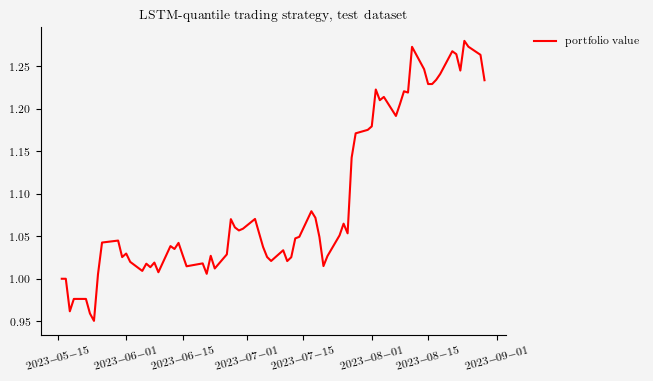

In [ ]:
# plot
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(portfolio_LSTM, color = "red", label = 'portfolio value')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("LSTM-quantile trading strategy, test dataset")
plt.savefig('portLSTMTest.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

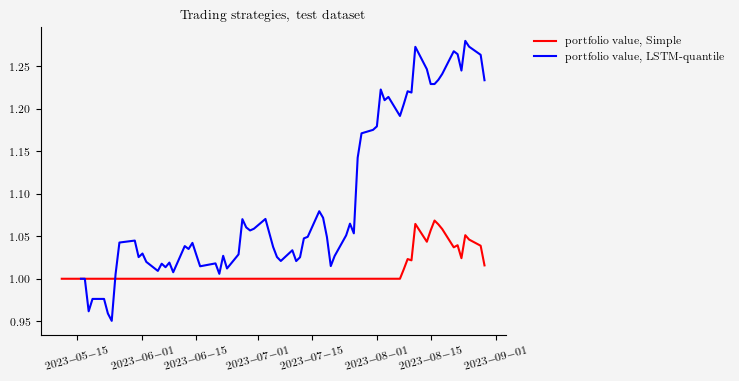

In [ ]:
# together
# plot
fig, ax = plt.subplots(figsize = (6, 4), facecolor='#f4f4f4')
ax.set_facecolor("#f4f4f4")
plt.plot(portfolio, color = "red", label = 'portfolio value, Simple')
plt.plot(portfolio_LSTM, color = "blue", label = 'portfolio value, LSTM-quantile')
ax.spines['top'].set_visible(False) ; ax.spines['right'].set_visible(False)
plt.xticks(rotation = 15, ha = "center")
plt.legend(frameon=False, bbox_to_anchor=(1.04, 1))
plt.title("Trading strategies, test dataset")
plt.savefig('portTest.jpg',format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=False, dpi=1200)
plt.show()

### Wordcloud

In [ ]:
!pip install feedparser
import feedparser
from datetime import datetime
import matplotlib.pyplot as plt
import jieba
from wordcloud import ImageColorGenerator, WordCloud
import PIL.Image
import numpy as np
import os

In [ ]:
# IMPORT THE BACKGROUND PICTURE
# set the search parameters
filename = 'trythis.png'
#search_path = '/content/drive' #
search_path = '/content/drive/My Drive'

# search for the file
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

# import dataset
mask = np.array(PIL.Image.open(file_path))

In [ ]:
# SCRAPE WEBSITE
news = feedparser.parse("https://www.cnbc.com/id/19854910/device/rss/rss")
text = []
for index, item in enumerate(news.entries):
    print("{0}. {1}".format(index, item["title"]))
    text.append(item["title"] + " - " + item["description"])
with open("news.txt", "w", encoding="utf-8") as file:
    for line in text:
        file.write(line + "\n")
with open("news.txt") as file:
    text=file.read()
wl_space_split = list(jieba.cut(text))
wl_space_split = [item for item in wl_space_split if item != "s"] # remove all "s" (as in "'s")

In [ ]:
# FIX COLOURING OF CLOUD
from matplotlib import colors
import colorsys
import random

color = 'xkcd:blood red'            # font color
r,g,b = colors.to_rgb(color)        # red, green, blue
h,l,s = colorsys.rgb_to_hls(r,g,b)  # hue, lightness, saturation

#  hls_color_func function for generating font color of random lightness
hsl_val = 'hsl(' + str(h*360) + ', 100%%, %d%%)'
def hsl_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return(hsl_val % np.random.randint(0,100))

In [ ]:
# FIX FONT FOR CLOUD
font_path = "/content/drive/My Drive/latinmodern-math.otf"

In [ ]:
# CREATE THE WORD CLOUD
image_colors = ImageColorGenerator(mask) #whitesmoke
cloud_ = WordCloud(font_path=font_path, background_color="#cccccc",
                   # plot baseline and predictions
                   mask = mask, contour_width = 0.5, relative_scaling=1,
                   contour_color = "red", collocations=False, max_words=10000).generate(" ".join(wl_space_split))
#  hls_color_func function - font colour of random lightness
cloud_.recolor(color_func = hsl_color_func)

plt.xticks([]) ; plt.yticks([]) ; plt.imshow(cloud_)
plt.savefig('bull.jpg', format='jpg', bbox_inches="tight", pad_inches=0.5, transparent=True, dpi=1200) # change format here if needed
plt.show() ;

# old stuff

The following uses cointegration for pairs trading on US technology stocks. Need to consider how to make it more advanced and fit the lecture style:
- add some filtering (PCA, DBSCAN) to select stock pairs to evalaute?
- Kalman filters or Fourier transformations?
- model the spread using ML (like, LSTM or another ML regression to forecast spread level (or even classification with random forest, so spread widen/shorten)) and take positions based on this? SVM as well
- make it applicable to all possible pairs and not just one? Something must be wrong with my `trade_all` function.


source:

https://medium.com/auquan/pairs-trading-data-science-7dbedafcfe5a


look also here for inspiration:

- https://github.com/icopy-site/awesome/blob/master/docs/awesome/awesome-ai-in-finance.md
- https://anonymous.4open.science/r/cc3047bb-b0e1-4442-82f8-43501909704a/Code/.ipynb_checkpoints/Cloned%20from%20Pairs%20Trading%20with%20Machine%20Learning-checkpoint.ipynb
- https://openaccess.nhh.no/nhh-xmlui/bitstream/handle/11250/2561266/masterthesis.PDF?sequence=1

In [ ]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [ ]:
# find cointegrated stock pairs
scores, pvalues, pairs = find_cointegrated_pairs(prices_train) # train dataset
# scores, pvalues, pairs = find_cointegrated_pairs(prices) # full dataset

In [ ]:
# the cointegrated pairs
print("# pairs:", len(pairs))
print(pairs)

In [ ]:
news = feedparser.parse("https://www.ft.com/?edition=international&format=rss")

text = []
for index, item in enumerate(news.entries):
    print("{0}. {1}".format(index, item["title"]))
    text.append(item["title"] + " - " + item["summary"])

with open("news.txt", "w", encoding="utf-8") as file:
    for line in text:
        file.write(line + "\n")

with open("news.txt") as file:
    text=file.read()

wl_space_split = list(jieba.cut(text))
wl_space_split = [item for item in wl_space_split if item != "s"] # remove all "s" (as in "'s")

image_colors=ImageColorGenerator(mask)
cloud_=WordCloud(background_color="white", width=1000, height=1000,
                 mask=mask, contour_width=1, font_path=font_path, relative_scaling=1.0,
                 collocations=False, max_words=1000)

cloud_.generate(" ".join(wl_space_split))

plt.xticks([])
plt.yticks([])
plt.imshow(cloud_)
plt.show()

In [ ]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(12,6))

plt.plot(S1_train, color='b')
plt.plot(S2_train, color='c')
buyR = 0*S1_train.copy() ; sellR = 0*S1_train.copy()

# When you buy the ratio, you buy stock S1 and sell S2
buyR[buy != 0] = S1_train[buy != 0]
sellR[buy != 0] = S2_train[buy != 0]

# When you sell the ratio, you sell stock S1 and buy S2
buyR[sell!=0] = S2_train[sell!=0]
sellR[sell!=0] = S1_train[sell!=0]

plt.plot(buyR, color='g', linestyle='None', marker='^')
plt.plot(sellR, color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, min(S1.min(), S2.min()), max(S1.max(), S2.max())))
plt.legend(['S1', 'S2', 'Buy Signal', 'Sell Signal'])
plt.show()

In [ ]:
def find_cointegrated_pairs(data, alpha):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue

    # Benjamini-Hochberg procedure [assumption: independence or some forms of positive dependency of test statistics]
    indices = np.triu_indices(n, k=1)
    pvalues = pvalue_matrix[indices]
    ranks = stats.rankdata(pvalues)
    adjusted_significance_matrix = np.zeros((n, n))
    adjusted_significance_matrix[indices] = alpha * ranks / len(pvalues)

    for i in range(n):
        for j in range(i+1, n):
            if pvalue_matrix[i, j] < adjusted_significance_matrix[i, j]:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

scores, pvalues, pairs = find_cointegrated_pairs(prices_train, 0.05)

# the cointegrated pairs
print("# pairs:", len(pairs))
print(pairs)